<a href="https://colab.research.google.com/github/vhac58/ViruelaSimica/blob/main/Analisis_ViruelaSimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto final de Analisis y Visualización de Datos** - Bootcamp AVDH2 217

Presentado a los ingenieros Jesus Rubio y Jaime Avila, docentes

Realizado por Victor Hugo Alvarez Castaño, campista

Bogota DC, noviembre de 2024

Este proyecto tiene como objetivo poner en practica los conocimientos, conceptos, metodos y lineamientos para el analisis y visualización de datos, así como el uso de las diferentes herramientas informaticas provistas e ilustradas por los docentes durante el desarrollo del bootcamp.

Para el ejercicio seleccione un conjunto de datos relacionados con la enfermedad llamada Viruela Símica (viruela del mono o MonkeyPox), publicado por el Instituto Nacional de Salud de Colombia en el portal de Datos Abiertos (Datos.gov.co)

Los pasos a seguir fueron:

1.	Alistamiento de la Información.
Se trabajó con la URL -> https://www.datos.gov.co/, desde la cual se descargó el conjunto de datos “Casos positivos de Viruela símica en Colombia” con catálogo de variables en: http://url.ins.gov.co/catalogo-variables-viruela-simica. Desde el sitio de www.ins.gov.co se descargaron tambien el protocolo de vigilancia de la enfermedad y la ficha epidemiológica con la cual se recopilan los datos.
Desde el sitio de www.datos.gov.co se descargó el software Open Refine para la limpieza de datos.

2.	Procesamiento de la Información. Usando Python y Google Colab. Revisado el conjunto de datos y documentos relacionados, se plantearon las siguientes preguntas:
¿Que distribución tienen los casos de viruela por edad, sexo, geografía, etnia, fuente de infección y condición final?.
¿Cual es la tendencia temporal y que nos muestran los intervalos de tiempos transcurridos entre las fechas de aparición de síntomas, exantema, diagnóstico, notificación, y fecha de cierre del seguimiento de cada caso?.

3.	Presentación de la Información. Almacenamiento del proyecto en la plataforma de Github para tener disponibilidad y acceso a los documentos ahi almacenados. Además me permite usar la interfaz de Colab para ejecutar los comandos de python y enviar cambios al repositorio de GitHub.


El conjunto de datos tienen 4.269 filas o registros que corresponden a los casos de personas afectadas por viruela símica y 24 columnas que describen caracteristicas de persona, lugar y tiempo, entre otras variables.


Con la opción FACETAS /Filtros de Open Refine se llevó a cabo la revisión y depuración de cada una de las variables del conjunto de datos, explorando los valores de los datos, su formato y necesidades de limpieza.

En esta primera faceta se muestra las 52 opciones que corresponden a la cantidad de semanas epidemiológicas de acuerdo con el calendario estándar adoptado para el reporte semanal.

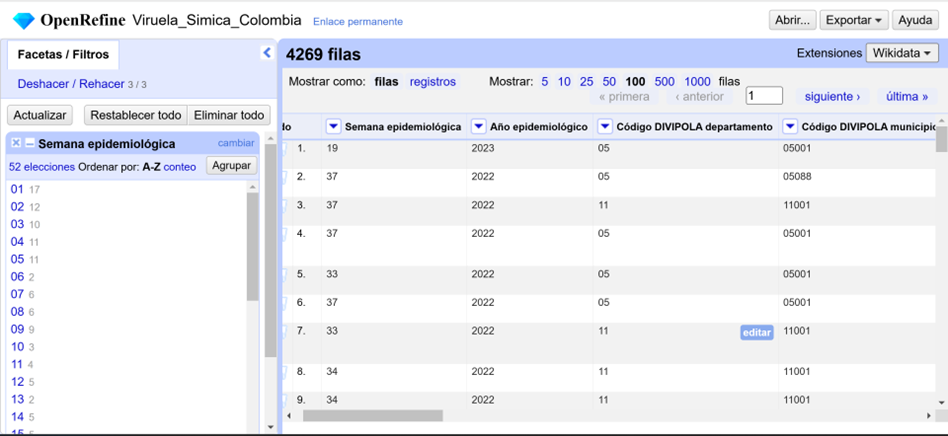

La variable año epidemiológico muestra que la mayoría de casos ocurrieron en 2022, lo cual corresponde al 95.1% de los casos.

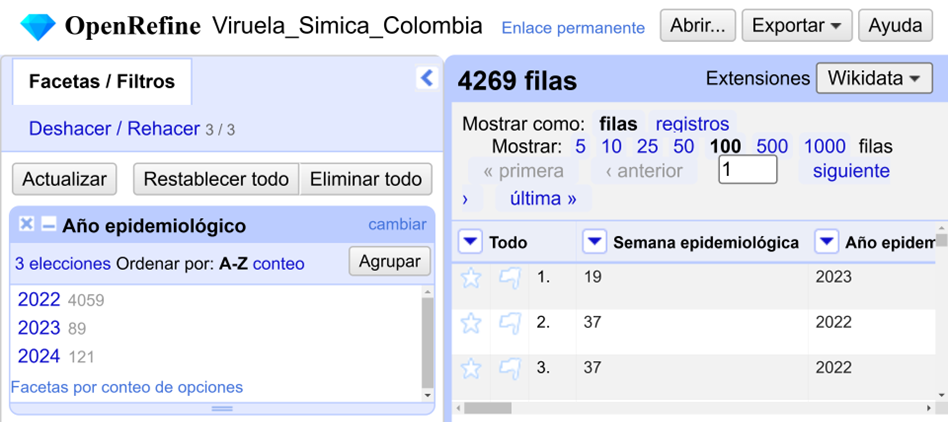


Las variables geograficas del conjunto constan de nombres y codigos Divipola de departamentos y municipios. En el conjunto se observa distritos en la columna de departamentos con codigos de 5 digitos para los municipios correspondientes. Se recodificaron los distritos de al codigo del respectivo departamento, así: Barranquilla 08001 → 08, Cartagena 13001 → 13, Santa Marta 47001 → 47, Cali 76001 → 76, y dos blancos que corresponden a los municipios de Andalucía Valle del Cauca 76036 y Patía Cauca 19532. El departamento codificado 01 corresponde a España 724, se deja sin cambios. Con la recodificación quedan 27 de 31 opciones de departamento.

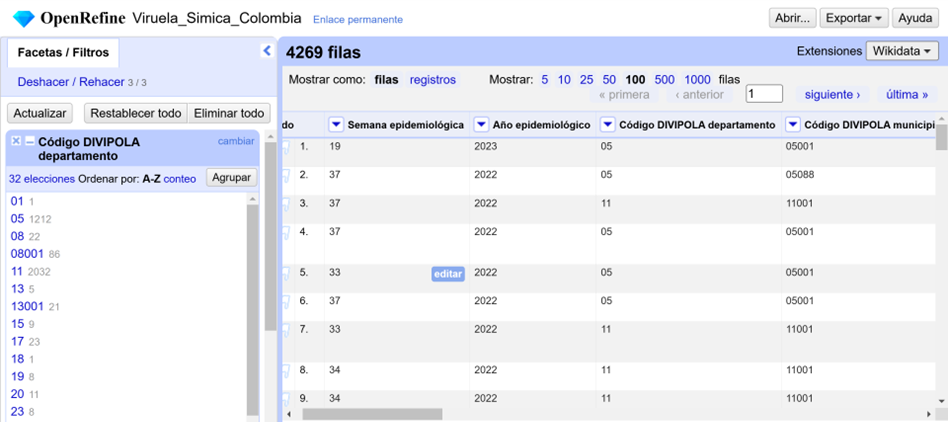


De la columna de municipios con 131 opciones se destaca que la mayoria de casos (3.440) se concentran en los municipios de Bogota (47.6%), Medellín (24.3) y Cali (8.7%).

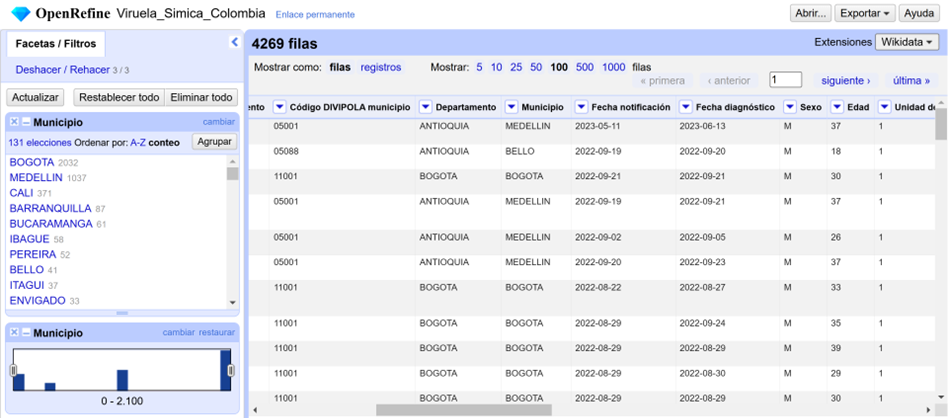

El conjunto de datos contiene 5 variables relacionadas con fechas de Aparición de sintomas, aparición de Exantema o brote (sintoma principal), diagnóstico, notificación y terminación de seguimiento de cada caso.
Todas aparentaban tener el mismo formato.

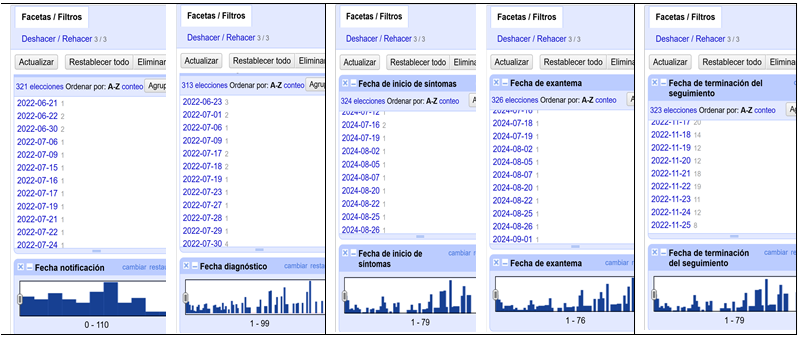

Las variables demograficas relacionadas con sexo, edad y pertenencia etnica, muestran predominio de casos masculinos (96.8%), un rango de edad entre 1 y 81 años, solo un caso de meses, y la mayoria de casos no reportaron ninguna pertenencia etnica (98.9%).

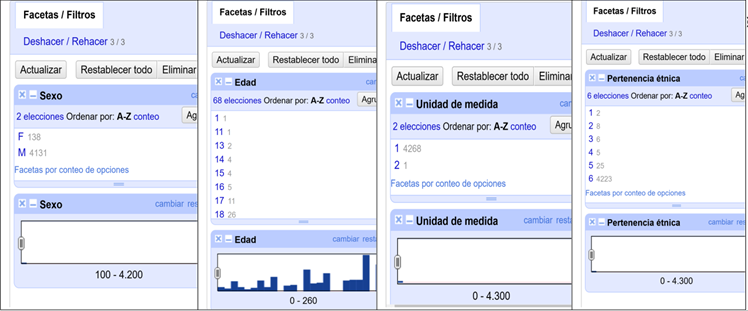

Otras variables socidemograficas muestran una mayor variedad en la distribución por regimen de afiliación a la Seguridad Social (77.8% contributivo) y estrato social (66.0% estratos 2 y 3). la variable presneta valores de "999" no contemplada en la metadata, que supone "sin información"; dos valores en blanco se recodificaron en “999”. El antecedente de viaje muestra una frecuencia baja de 3.4%, es decir 153 casos que viajaron a 26 destinos internacionales.

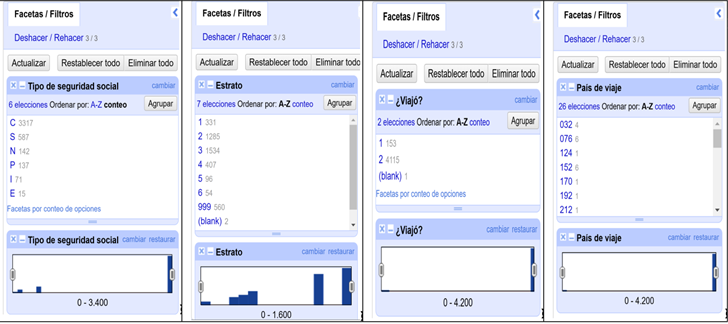

Las variables de antecedentes epidemiologicos muestran una frecuencia alta de fuente de infección desconocida (92.4%), sin vinculo epidemiologico (99.2%), casos que no requirieron hospitalización (99.2%) y menos del 1% de casos fatales (35 personas fallecidas infectadas con MonkeyPox).

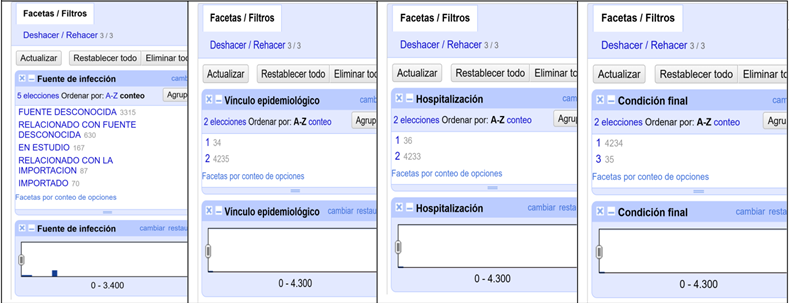





Una vez depurado el archivo en Open refine, se exporta una copia "Viruela_Simica_Colombia_limpio".csv, y se carga en el repositorio de Github. Desde alli se dispone el archivo para el analisis y visualización en otras aplicaciones. Para ello se utiliza la URL que muestra el archivo en formato original despues de editarlo con la opción RAW
https://raw.githubusercontent.com/vhac58/ViruelaSimica/refs/heads/main/Viruela_Simica_Colombia_limpio.csv

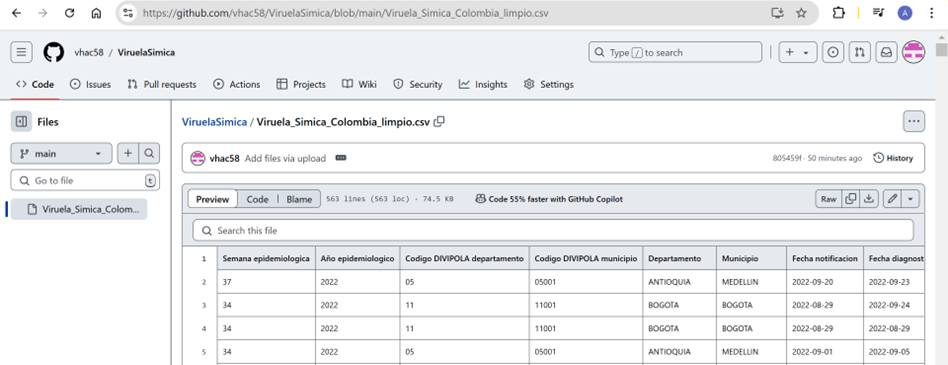

En Google Colab se abre este Notebook "Analisis Viruela Simica.ipynb" y se importan todas las librerias que se necesitan para el analisis y visualización.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_viruela=pd.read_csv('https://raw.githubusercontent.com/vhac58/ViruelaSimica/refs/heads/main/Viruela_Simica_Colombia_limpio.csv')

In [5]:
df_viruela
## el dataframe denominado Viruela muestra los datos organizados en filas y columnas. Se verifica que el archivo importó 4.269 rows × 23 columns

,Semana epidemiologica,Ano epidemiologico,Codigo DIVIPOLA departamento,Codigo DIVIPOLA municipio,Departamento,Municipio,Fecha notificacion,Fecha diagnostico,Sexo,Edad,...,Hospitalizacion,Condicion final,Vi­nculo epidemiologico,¿Viajo?,Pai­s de viaje,Fuente de infeccion,Fecha de terminacion del seguimiento,Pertenencia etnica,Tipo de seguridad social,Estrato
0,19,2023,5,5001,ANTIOQUIA,MEDELLIN,2023-05-11,2023-06-13,M,37,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2023-05-31,6,C,3
1,37,2022,5,5088,ANTIOQUIA,BELLO,2022-09-19,2022-09-20,M,18,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-10-06,6,C,2
2,37,2022,11,11001,BOGOTA,BOGOTA,2022-09-21,2022-09-21,M,30,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-10-04,6,C,2
3,37,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-19,2022-09-21,M,37,...,2,1,2,2,NaN,RELACIONADO CON FUENTE DESCONOCIDA,2022-10-08,6,S,3
4,33,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-02,2022-09-05,M,26,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-09-10,6,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,29,2024,8,8001,ATLANTICO,BARRANQUILLA,2024-07-24,2024-07-26,M,28,...,2,1,2,2,NaN,EN ESTUDIO,2024-08-06,6,C,3
4265,35,2024,8,8001,ATLANTICO,BARRANQUILLA,2024-08-31,2024-09-04,M,31,...,2,1,2,2,NaN,EN ESTUDIO,2024-09-15,6,S,2
4266,34,2024,11,1,BOGOTA,BOGOTA,2024-09-02,2024-09-03,M,43,...,2,1,2,2,NaN,EN ESTUDIO,2024-09-10,6,C,3
4267,35,2024,1,724,BARCELONA,BARCELONA,2024-09-03,2024-09-05,M,35,...,2,1,2,1,724.0,EN ESTUDIO,2024-09-19,6,C,3


In [ ]:
type(df_viruela)
## Con esta instrucción se indica la clase de DataFrame que se define en la biblioteca de pandas a partir de las columnas y lista de valores del archivo suministrado.

pandas.core.frame.DataFrame

In [6]:
df_viruela.info()
## La instrucción df_viruela.info() en Pandas se utiliza para obtener un resumen conciso de un objeto DataFrame llamado df_viruela. Este método es útil para entender rápidamente la estructura de los datos contenidos en el DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Semana epidemiologica                 4269 non-null   int64  
 1   Ano epidemiologico                    4269 non-null   int64  
 2   Codigo DIVIPOLA departamento          4269 non-null   int64  
 3   Codigo DIVIPOLA municipio             4269 non-null   int64  
 4   Departamento                          4269 non-null   object 
 5   Municipio                             4269 non-null   object 
 6   Fecha notificacion                    4269 non-null   object 
 7   Fecha diagnostico                     4269 non-null   object 
 8   Sexo                                  4269 non-null   object 
 9   Edad                                  4269 non-null   int64  
 10  Unidad de medida                      4269 non-null   int64  
 11  Fecha de inicio d

¿Qué información proporciona esta instrucción?
Cuando se ejecuta df_viruela.info(), se obtiene una descripcion del DF:

1. Tipo de objeto: Se indica que es un DataFrame.
2. Número de filas y columnas: Se muestra el número total de filas y columnas del DataFrame.
3. Nombre de las columnas: Aparece una lista de los nombres de todas las columnas.
4. No. de valores no nulos por columna: Informa cuántos valores no nulos hay en cada columna. Esto es útil para identificar valores faltantes. El conjunto de datos no presenta valores nulos por la depuración previa durante la limpieza de datos con Open Refine.
5. Tipo de dato por columna: Indica el tipo de dato de cada columna (int64, float64, object, bool, etc.).
6. Uso de memoria: Se muestra la cantidad aproximada de memoria que ocupa el DataFrame.

In [ ]:
df_viruela.describe()

,Semana epidemiologica,Ano epidemiologico,Codigo DIVIPOLA departamento,Codigo DIVIPOLA municipio,Edad,Unidad de medida,Hospitalizacion,Condicion final,Vi­nculo epidemiologico,¿Viajo?,Pai­s de viaje,Pertenencia etnica,Estrato
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,153.000000,4269.000000,4269.000000
mean,36.370813,2022.077536,20.010541,19973.570625,32.290700,1.000234,1.991567,1.008199,1.992036,1.964160,548.274510,5.977747,133.842352
std,6.629292,0.358109,23.927856,23911.660422,8.379168,0.015305,0.091453,0.090185,0.088898,0.185912,264.127766,0.253784,336.902753
min,1.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,1.000000
25%,34.000000,2022.000000,5.000000,5088.000000,27.000000,1.000000,2.000000,1.000000,2.000000,2.000000,276.000000,6.000000,2.000000
50%,36.000000,2022.000000,11.000000,11001.000000,31.000000,1.000000,2.000000,1.000000,2.000000,2.000000,591.000000,6.000000,3.000000
75%,39.000000,2022.000000,11.000000,11001.000000,37.000000,1.000000,2.000000,1.000000,2.000000,2.000000,826.000000,6.000000,4.000000
max,52.000000,2024.000000,95.000000,95001.000000,81.000000,2.000000,2.000000,2.000000,2.000000,2.000000,862.000000,6.000000,999.000000


Con la instrucción describe se muestran las estadisticas basicas del DF. Un ejemplo de estadisticas basicas de la variable EDAD muestra que la edad promedio de las personas reportadas es de 32.3 años. El 50% de las personas reportadas estan en la franja entre 27 y 37 años indicando la alta frecuencia de viruela símica en personas adultas jovenes.

In [ ]:
df_viruela.describe(include=[object])

,Departamento,Municipio,Fecha notificacion,Fecha diagnostico,Sexo,Fecha de inicio de si­ntomas,Fecha de exantema,Fuente de infeccion,Fecha de terminacion del seguimiento,Tipo de seguridad social
count,4269,4269,4269,4269,4269,4269,4269,4269,4269,4269
unique,28,131,321,313,2,324,326,5,323,6
top,BOGOTA,BOGOTA,2022-09-12,2022-09-19,M,2022-08-29,2022-08-20,FUENTE DESCONOCIDA,2022-09-19,C
freq,2032,2032,102,98,4131,78,75,3315,78,3317


La instrucción df_viruela.describe(include=[object]) en Pandas se utiliza para generar un resumen estadístico de las columnas categóricas o de tipo object (datos no numéricos) dentro del DataFrame df_viruela.

¿Qué hace exactamente? El método .describe() se usa para obtener estadísticas resumidas. Por defecto, solo funciona con columnas numéricas, pero al incluir el argumento include=[object], se limita a analizar las columnas categóricas o de texto.

Cuando se aplica a columnas de tipo object, el resumen incluye:
1. count: Número de valores no nulos en la columna.
2. unique: Número de valores únicos en la columna.
3. top: Valor más frecuente en la columna.
4. freq: Frecuencia del valor más frecuente (top).


In [ ]:
df_viruela.head()

,Semana epidemiologica,Ano epidemiologico,Codigo DIVIPOLA departamento,Codigo DIVIPOLA municipio,Departamento,Municipio,Fecha notificacion,Fecha diagnostico,Sexo,Edad,...,Hospitalizacion,Condicion final,Vi­nculo epidemiologico,¿Viajo?,Pai­s de viaje,Fuente de infeccion,Fecha de terminacion del seguimiento,Pertenencia etnica,Tipo de seguridad social,Estrato
0,19,2023,5,5001,ANTIOQUIA,MEDELLIN,2023-05-11,2023-06-13,M,37,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2023-05-31,6,C,3
1,37,2022,5,5088,ANTIOQUIA,BELLO,2022-09-19,2022-09-20,M,18,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-10-06,6,C,2
2,37,2022,11,11001,BOGOTA,BOGOTA,2022-09-21,2022-09-21,M,30,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-10-04,6,C,2
3,37,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-19,2022-09-21,M,37,...,2,1,2,2,NaN,RELACIONADO CON FUENTE DESCONOCIDA,2022-10-08,6,S,3
4,33,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-02,2022-09-05,M,26,...,2,1,2,2,NaN,FUENTE DESCONOCIDA,2022-09-10,6,S,4


La instrucción df_viruela.head() en Pandas se utiliza para mostrar las primeras filas de un DataFrame, en este caso df_viruela. Por defecto, muestra las primeras 5 filas del DataFrame. Si el DataFrame tiene menos de 5 filas, mostrará todas las disponibles. Se puede especificar un número en los paréntesis para ver una cantidad diferente de filas, por ejemplo:
df_viruela.head(3) mostrará las primeras 3 filas. Esta instrucción es útil porque permite inspeccionar rápidamente los datos al inicio del DataFrame.
Útil para entender cómo están organizados los datos o verificar la carga de datos correcta.

In [ ]:
df_viruela["Fuente de infeccion"].unique()

array(['FUENTE DESCONOCIDA', 'RELACIONADO CON FUENTE DESCONOCIDA',
       'RELACIONADO CON LA IMPORTACION', 'IMPORTADO', 'EN ESTUDIO'],
      dtype=object)

In [ ]:
df_viruela["Sexo"].value_counts()

,count
Sexo,
M,4131
F,138


In [ ]:
df_viruela["Sexo"].value_counts("%")

,proportion
Sexo,
M,0.967674
F,0.032326


Solo un 3% de las personas reportadas con viruela simica son mujeres. Que factor de exposición hace que la mayoría de pacientes sean hombres? En este conjunto de datos sería ideal tener muchos mas atributos de las personas afectadas, tales como ocupación.

In [ ]:
df_viruela["Departamento"].value_counts("%")

,proportion
Departamento,
BOGOTA,0.475990
ANTIOQUIA,0.283907
VALLE,0.100023
ATLANTICO,0.025299
CUNDINAMARCA,0.022956
SANTANDER,0.018974
RISARALDA,0.015226
TOLIMA,0.014055
META,0.007027


In [ ]:
df_viruela.groupby("Departamento").count()

,Semana epidemiologica,Ano epidemiologico,Codigo DIVIPOLA departamento,Codigo DIVIPOLA municipio,Municipio,Fecha notificacion,Fecha diagnostico,Sexo,Edad,Unidad de medida,...,Hospitalizacion,Condicion final,Vi­nculo epidemiologico,¿Viajo?,Pai­s de viaje,Fuente de infeccion,Fecha de terminacion del seguimiento,Pertenencia etnica,Tipo de seguridad social,Estrato
Departamento,,,,,,,,,,,,,,,,,,,,,
ANTIOQUIA,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,...,1212,1212,1212,1212,38,1212,1212,1212,1212,1212
ATLANTICO,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,3,108,108,108,108,108
BARCELONA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BOGOTA,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032,...,2032,2032,2032,2032,82,2032,2032,2032,2032,2032
BOLIVAR,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,2,26,26,26,26,26
BOYACA,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,0,9,9,9,9,9
CALDAS,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,4,23,23,23,23,23
CAQUETA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CASANARE,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,0,3,3,3,3,3


In [ ]:
df_viruela.groupby("Sexo").agg({"Edad":"mean"})

,Edad
Sexo,
F,31.289855
M,32.324135


La instrucción df_viruela.groupby("Sexo").agg({"Edad": "mean"}) en Pandas se utiliza para agrupar los datos por la columna Sexo y luego aplicar una función de agregación (en este caso, calcular el promedio de la columna Edad) para cada grupo.

La instrucción df_viruela.groupby("Sexo"): agrupa el DataFrame df_viruela por los valores únicos de la columna Sexo. Esto crea un objeto GroupBy, donde los datos están organizados en grupos basados en los valores de Sexo.

La instrucción .agg({"Edad": "mean"}): especifica que se desea aplicar la función de agregación promedio (mean) a la columna Edad dentro de cada grupo. El argumento dentro de .agg() se pasa como un diccionario, donde:
La clave ("Edad") es la columna a la que se aplica la agregación. El valor ("mean") es la función de agregación.

El resultado devuelve un nuevo DataFrame o Series con los valores agrupados por Sexo y el promedio de las edades en cada grupo.

In [ ]:
pd.crosstab(df_viruela.Departamento, df_viruela.Sexo)

Sexo,F,M
Departamento,,
ANTIOQUIA,49,1163
ATLANTICO,2,106
BARCELONA,0,1
BOGOTA,46,1986
BOLIVAR,1,25
BOYACA,1,8
CALDAS,1,22
CAQUETA,0,1
CASANARE,0,3


In [ ]:
pd.crosstab(df_viruela['Condicion final'], df_viruela['Fuente de infeccion'])

Fuente de infeccion,EN ESTUDIO,FUENTE DESCONOCIDA,IMPORTADO,RELACIONADO CON FUENTE DESCONOCIDA,RELACIONADO CON LA IMPORTACION
Condicion final,,,,,
1,167,3285,69,626,87
2,0,30,1,4,0


La instrucción pd.crosstab(df_viruela['Condicion final'], df_viruela['Fuente de infeccion']) en Pandas genera una tabla de contingencia que cruza dos columnas del DataFrame df_viruela:

1. Condicion final: Aparecerá como las filas de la tabla.
2. Fuente de infeccion: Aparecerá como las columnas de la tabla.

Descripción de la función pd.crosstab
1. pd.crosstab(index, columns): crea una tabla que cuenta las ocurrencias de combinaciones entre los valores de las columnas especificadas.
2. El argumento index define las filas de la tabla.
3. El argumento columns define las columnas de la tabla.

Cómputo. Para cada combinación única de Condicion final (filas) y Fuente de infeccion (columnas), se cuenta el número de ocurrencias en el DataFrame.

Según la Fuente de infección, los casos se clasifican así:
(i) Caso importado. Caso confirmado en una persona con antecedente de viaje a otro país donde circula el virus, durante el período de posible exposición (5 a 21 días antes del inicio del pródromo).
(ii) Relacionado con la importación. Caso confirmado que, según las pruebas epidemiológicas y virológicas, estuvo expuesto localmente al virus y forma parte de una cadena de transmisión originada por un caso importado.
(iii) Fuente desconocida. Caso confirmado al cual no se le pueden identificar cadenas de transmisión o fuente de infección.
(iv) Relacionado con fuente desconocida. Caso confirmado que hace parte de una cadena de transmisión secundaria o un caso confirmado de fuente desconocida.

La mayoría de los casos en Colombia son de fuente desconocida y sus contactos relacionados, equivalentes a un total de 3.945 casos (92,4%).

In [ ]:
# prompt: series de tiempo
## Utilizando al opcion de crear codigo con IA, se explora el analisis de series de tiempo que se apliquen a este conjunto de datos

# Convert the 'Fecha diagnostico' column to datetime objects.
df_viruela['Fecha diagnostico'] = pd.to_datetime(df_viruela['Fecha diagnostico'])

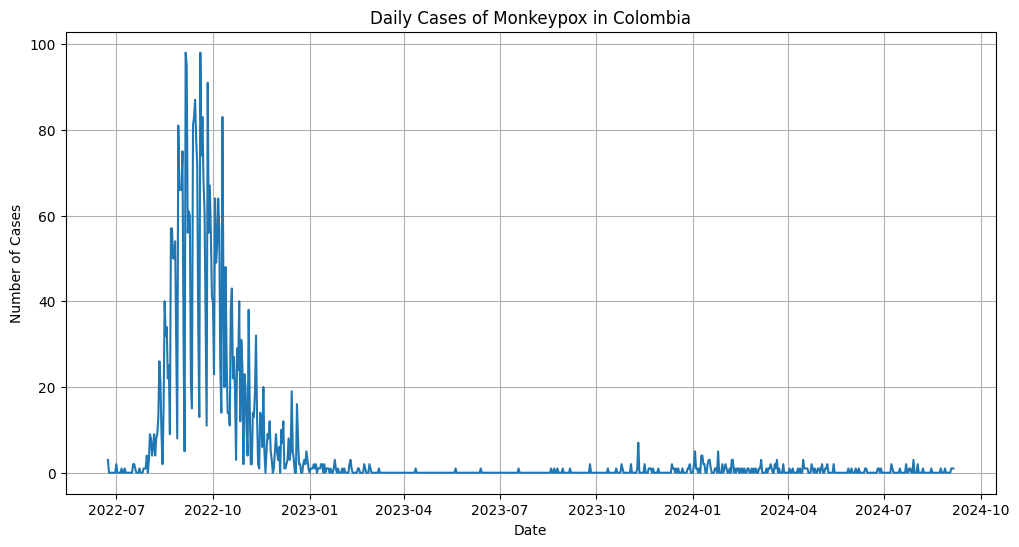

In [ ]:
# prompt: serie de tiempo

# Assuming 'Fecha diagnostico' is already converted to datetime objects as in the previous code.

# Set 'Fecha diagnostico' as the index
df_viruela = df_viruela.set_index('Fecha diagnostico')

# Resample the data to a daily frequency and count the number of cases
daily_cases = df_viruela.resample('D').size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases.values)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily Cases of Monkeypox in Colombia')
plt.grid(True)
plt.show()

La grafica muestra el conglomerado de casos que se presentaron como un brote en el segundo semestre del año 2022 concentrando la mayoria de casos. Cada punto es un conteo de casos ocurridos en la misma fecha.

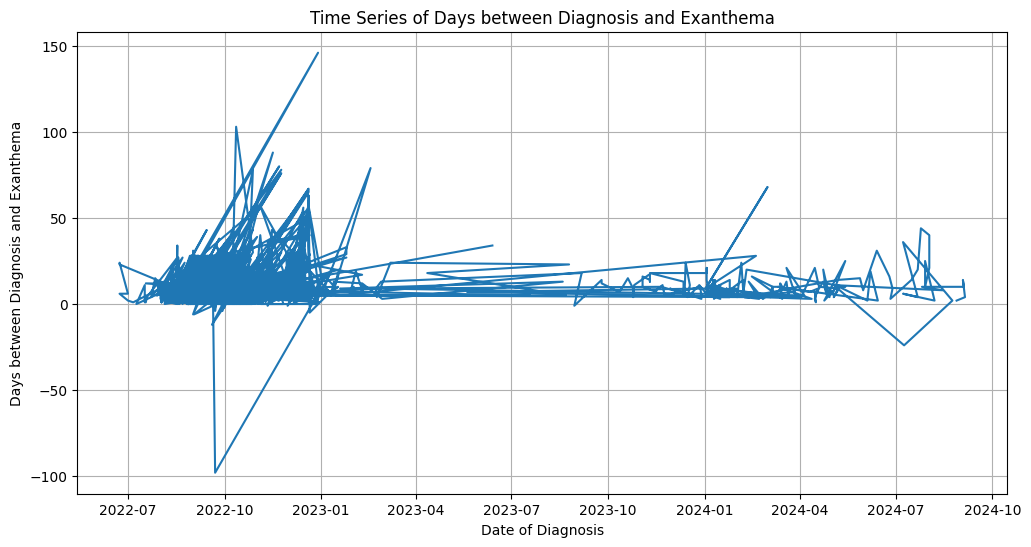

In [ ]:
# prompt: serie de tiempo con intervalo de tiempo entre fecha diagnostico y fecha exantema
df_viruela = df_viruela.reset_index()
# Convert 'Fecha de exantema' to datetime objects.
df_viruela['Fecha de exantema'] = pd.to_datetime(df_viruela['Fecha de exantema'])

# Calculate the time difference between 'Fecha diagnostico' and 'Fecha de exantema'
df_viruela['Time Difference'] = df_viruela['Fecha diagnostico'] - df_viruela['Fecha de exantema']

# Convert the time difference to days
df_viruela['Time Difference'] = df_viruela['Time Difference'].dt.days

# Create the time series with the calculated time difference
time_series = df_viruela.set_index('Fecha diagnostico')['Time Difference']

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values)
plt.xlabel('Date of Diagnosis')
plt.ylabel('Days between Diagnosis and Exanthema')
plt.title('Time Series of Days between Diagnosis and Exanthema')
plt.grid(True)
plt.show()

Con este conjunto de instrucciones sugeridos por la IA se pretende visualizar la diferencias de las curvas de tendencia de fechas de aparición de exantema y el diagnostico de la enfermedad. Sin embargo, el resultado no es el esperado. Revisando las variables de fechas se encontró que tenia diferente formato y por ello cualquier operación es erratica. Se procede a realizar la estandarización de formatos de fechas.

Para la conversion de campos de fecha se aplica las siguientes instrucciones

for col in df_viruela.columns:
    if 'Fecha' in col:
        df_viruela[col] = pd.to_datetime(df_viruela[col], format='%Y-%m-%d')
        print(f"Formato de fecha en: {col}")

Formato de fecha en: Fecha diagnostico; Fecha notificacion; Fecha de inicio de sintomas; Fecha de exantema; Fecha de terminacion del seguimiento

1. if 'Fecha' in col: comprueba si el nombre de la columna contiene la palabra 'Fecha'. Esto identifica automáticamente las columnas relacionadas con fechas (por ejemplo, "Fecha diagnostico", "Fecha notificacion", etc.).
2. df_viruela[col] = pd.to_datetime(df_viruela[col], format='%Y-%m-%d'), convierte el contenido de la columna a un objeto de tipo datetime de Pandas usando el formato especificado ('%Y-%m-%d', es decir, Año-Mes-Día).


Para ver el resultado de la conversión de formatos de fechas, adjunto otro notebook "SerieTiempo_Viruela_Simica.ipynb"